# testing do file on happiness and GDP

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

# import the data

In [28]:
# here we need to use happiness data from the world happiness report
# GDP figures from maddison report. 
# the data has been slightly cleaned? 

In [30]:
happy = pd.read_csv('happiness_with_continent(2019).csv',index_col='Country name')

In [31]:
happy.head()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
Country name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,...,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,...,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,...,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,...,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [32]:
## the column names are pretty long 
## we should remember that we are using REAL GDP per capita 
happy= happy.rename(columns={'Log GDP per capita': 'gdppc', 'Life Ladder': 'happi'})
happy.head(n=2)

,Year,happi,gdppc,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
Country name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2008,3.723590,7.16869,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2009,4.401778,7.33379,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,...,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,Asia


# Inspect the data

In [6]:
#need to get to know the data you're using
happy.describe()

,gdppc,pop,happi
count,150.000000,1.500000e+02,150.000000
mean,18927.413333,4.796875e+04,5.429253
std,20704.108326,1.565074e+05,1.110420
min,589.000000,3.350000e+02,3.083000
25%,4192.250000,5.002000e+03,4.537800
50%,12606.500000,1.103450e+04,5.405900
75%,25223.750000,3.434750e+04,6.196175
max,156299.000000,1.372860e+06,7.768900


In [8]:
happy.shape

(150, 3)

In [9]:
print(happy.iloc[0]['happi'])
print(happy.loc['Afghanistan'][['happi','gdppc']])

3.2033
happi       3.2033
gdppc    1929.0000
Name: Afghanistan, dtype: float64


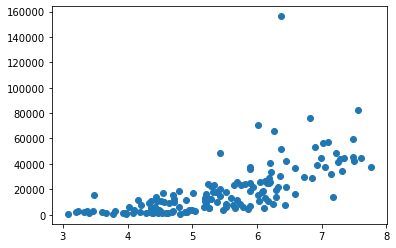

In [10]:
## lets try a quick plot 


plt.scatter(happy['happi'].values, happy['gdppc'].values)
plt.show()

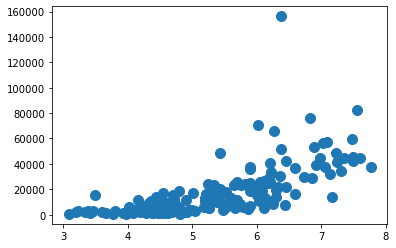

In [23]:
# create bubble map
#create the data
# ends up creating effectively the same chart because need a column for contient to portion it by
x=happy['happi'].values
y=happy['gdppc'].values 
z=100

plt.scatter(x, y, s=z)
plt.show()